In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import corner
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<ErrorbarContainer object of 3 artists>

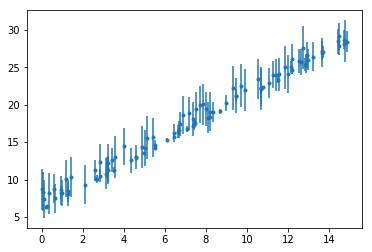

In [2]:
x_dat,y_dat,err_dat=np.loadtxt('datos.txt',unpack=True).T
plt.errorbar(x_dat, y_dat, err_dat, fmt='.')

In [3]:
#valores reales

a_real=1.5
b_real=6.

#valores para priors
a_inf=0.
a_sup=3.
b_inf=0.
b_sup=10.

In [21]:
# Función a ajustar
def f(x,a,b):
    return a*x+b

# Definimos el ln de los prior
#def lnprior(a,b):
#    if ((a_inf<a<a_sup) and (b_inf<b<b_sup)):
#        return 0.
#    else:
#        return -np.infty
#    return


#Definimos el Likelihood
def lnlike(x):
    a,b=x
    suma=0.0    
    if (a>a_sup) or (a<a_inf):
        return -np.infty
    if (a>b_sup) or (a<b_inf):
        return -np.infty
    evalu=f(x_dat,a,b)
    for i in range (0,len(x_dat)):
        suma+=-0.5*(((evalu[i]-y_dat[i])/err_dat[i]**2)**2)
    return suma

In [22]:
ndim, nwalkers=2,10
p0=[np.random.rand(ndim) for i in range (nwalkers)]
sampler=emcee.EnsembleSampler(nwalkers,ndim,lnlike)
results=sampler.run_mcmc(p0,10000)

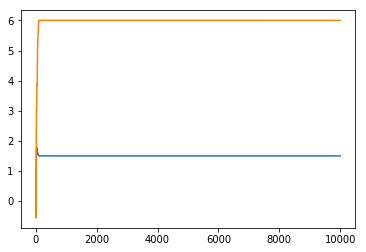

In [23]:
#plot del caminante 1, en ambos parámetros

plt.plot(sampler.chain[0,:,0])
plt.plot(sampler.chain[0,:,1])

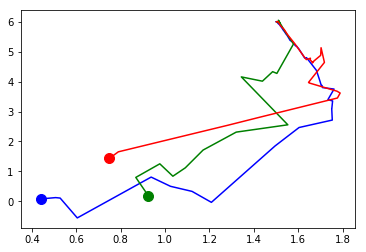

In [24]:
#gráfica de diferentes caminantes en el espacio de parámetros

plt.plot(sampler.chain[0,:,0], sampler.chain[0,:,1], color='b')
plt.scatter(sampler.chain[0,0,0], sampler.chain[0,0,1], s=100, color='b')
plt.plot(sampler.chain[1,:,0], sampler.chain[1,:,1], color='g')
plt.scatter(sampler.chain[1,0,0], sampler.chain[1,0,1], s=100, color='g')
plt.plot(sampler.chain[5,:,0], sampler.chain[5,:,1], color='r')
plt.scatter(sampler.chain[5,0,0], sampler.chain[5,0,1], s=100, color='r')

In [36]:
sampler.flatchain

array([[0.43921372, 0.07575993],
       [0.50691381, 0.11996068],
       [0.52720014, 0.1046196 ],
       ...,
       [1.50116452, 6.00377783],
       [1.50117712, 6.00379548],
       [1.50117712, 6.00379548]])

In [37]:
np.shape(sampler.flatchain)

(100000, 2)

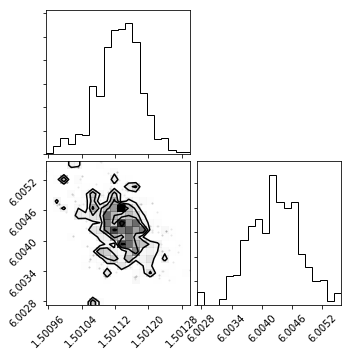

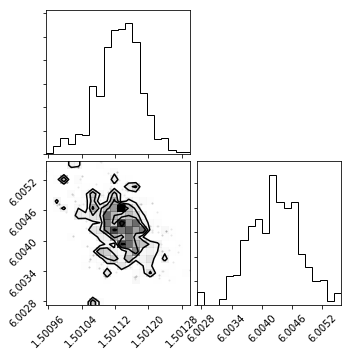

In [34]:
corner.corner(sampler.flatchain[-1000:])